In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Directory names
datadir = 'data'
hognames = ['ppc10cpb3', 'ppc12cpb3', 'ppc16cpb1', 'ppc16cpb3', 'ppc6cpb3', 'ppc8cpb2', 'ppc8cpb3', 'ppc8cpb4']

In [3]:
def average_rotations(dirname):
    num_rotations = 4
    rotation_dfs = [pd.read_csv('{}/filenames_scores_test{}.txt'.format(dirname, idx), sep=' ')
                    for idx in range(num_rotations)]
    rotation_dfs = [df.rename(columns={'score': 'score{}'.format(idx)})
                    for idx, df in enumerate(rotation_dfs)]
    average_df = reduce(lambda df1, df2: pd.merge(df1, df2.drop(['label'], axis=1), on='filename'), rotation_dfs)
    average_df['score'] = sum(average_df['score{}'.format(idx)] for idx in range(num_rotations)) / float(num_rotations)
    average_df[['filename', 'score', 'label']].to_csv('{}/filenames_scores_avg.csv'.format(dirname), index=False)

In [4]:
# Average over rotations for all HOG parameters and output the file
#for hogname in hognames:
#    for img_type in ['real', 'mock']:
#        average_rotations('{}/{}/{}'.format(datadir, hogname, img_type))

In [5]:
def read_score_file(filename):
    df = pd.read_csv(filename)
    col_names = ['objname', 'obstime', 'band', 'exp_num']
    for idx, col_name in enumerate(col_names):
        df[col_name] = df['filename'].apply(lambda fname: fname.split('_')[idx])
    df['objname'] = df['objname'].apply(lambda name: name.split('/')[-1])
    return df

In [6]:
# Read in the data for HOG parametrization, for real data
filescores_real = {hogname: read_score_file('{}/{}/real/filenames_scores_avg.csv'.format(datadir, hogname))
                   for hogname in hognames}

In [7]:
def get_max_score(filescore_dfs):
    filescore_dfs = [df.rename(columns={'score': 'score{}'.format(idx)})
                     for idx, df in enumerate(filescore_dfs)]
    max_df = reduce(lambda df1, df2: pd.merge(df1, df2[[col for col in df2.columns
                                                        if col == 'filename' or col.startswith('score')]],
                                              on='filename'),
                    filescore_dfs)
    max_df['score'] = [max(row[1]['score{}'.format(idx)] for idx, _ in enumerate(filescore_dfs))
                       for row in max_df.iterrows()]
    max_df = max_df.drop(['score{}'.format(idx) for idx, _ in enumerate(filescore_dfs)], axis=1)
    return max_df

In [8]:
# Get the max score over HOG parametrizations for each image
filescore_max_real = get_max_score(filescores_real.itervalues())

In [9]:
def plot_scores(filenames, scores, title=None):
    plt.clf()
    plt.figure(figsize=(15,15))
    plt.scatter(range(len(scores)), scores, marker='o')
    plt.xticks(range(len(scores)), filenames, rotation=90)  
    if title:
        plt.title(title)
    plt.show()

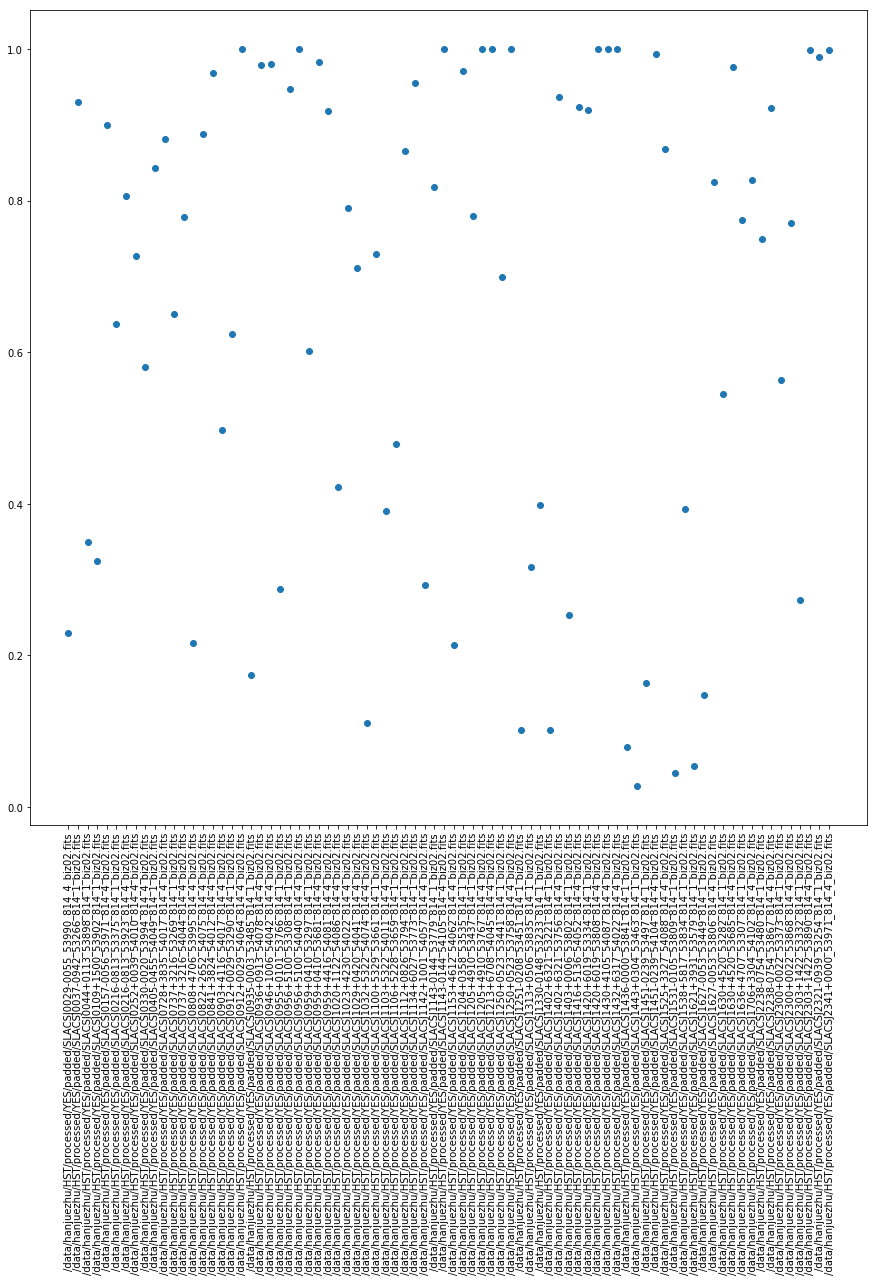

In [11]:
# Plot band 814 lensed
df = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 1)]
plot_scores(df['filename'], df['score'])

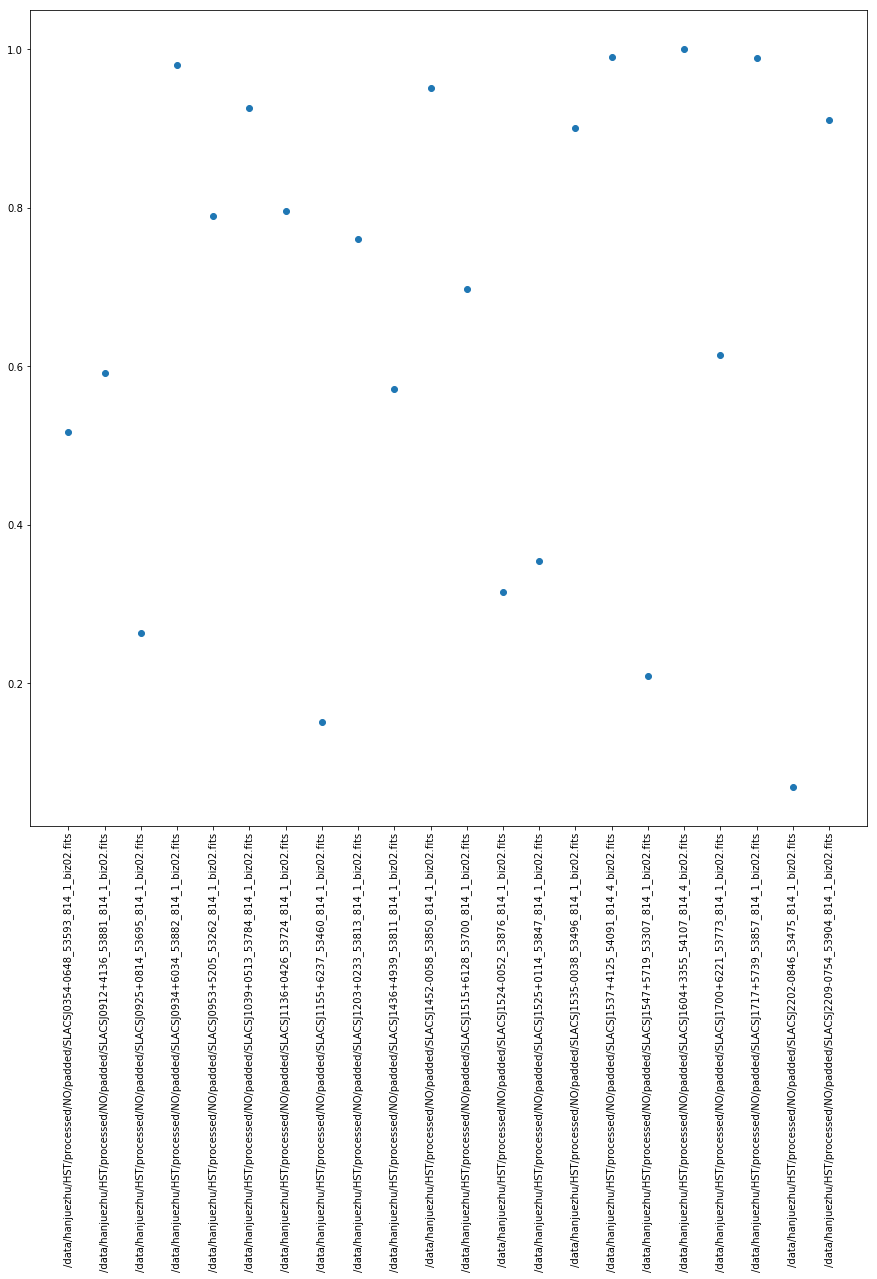

In [12]:
# Plot band 814 non-lensed
df = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 0)]
plot_scores(df['filename'], df['score'])

In [17]:
# Output filenames with lenses that have score < 0.5
bad_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 1) & \
                                   (filescore_max_real['score'] < 0.5)]['filename']
for filename in bad_filenames:
    print filename
    
print
print len(bad_filenames)

/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0029-0055_53990_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0044+0113_53898_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0109+1500_53902_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0808+4706_53995_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0903+4116_54017_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0935-0003_53485_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0955+0101_53766_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1020+1122_54086_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1032+5322_54074_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1103+5322_54011_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1106+5228_53659_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1142+1001_54057_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded

In [18]:
# Output filenames with lenses that have score >= 0.5
good_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 1) & \
                                    (filescore_max_real['score'] >= 0.5)]['filename']
for filename in good_filenames:
    print filename

print
print len(good_filenames)

/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0037-0942_53266_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0157-0056_53971_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0216-0813_53375_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0216-0813_53923_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0252+0039_54010_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0330-0020_53994_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0405-0455_54049_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0728+3835_54017_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_53269_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_54044_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0822+2652_54075_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0841+3824_54012_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded

In [19]:
# Output filenames with no lenses that have score >= 0.5
bad_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 0) & \
                                   (filescore_max_real['score'] >= 0.5)]['filename']
for filename in bad_filenames:
    print filename
    
print
print len(bad_filenames)

/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0354-0648_53593_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0912+4136_53881_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0934+6034_53882_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0953+5205_53262_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1039+0513_53784_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1136+0426_53724_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1203+0233_53813_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1436+4939_53811_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1452-0058_53850_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1515+6128_53700_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1535-0038_53496_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1537+4125_54091_814_4_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1604+3

In [20]:
# Output filenames with no lenses that have score < 0.5
good_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 0) & \
                                    (filescore_max_real['score'] < 0.5)]['filename']
for filename in good_filenames:
    print filename
    
print
print len(good_filenames)

/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0925+0814_53695_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1155+6237_53460_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1524-0052_53876_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1525+0114_53847_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1547+5719_53307_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ2202-0846_53475_814_1_biz02.fits

6


Previous Code

In [4]:
name_test = filescores['ppc12cpb3']['filename'][0]

In [5]:
name_test.split('_')

['/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0354-0648',
 '53593',
 '435',
 '1',
 'biz02.fits']

In [6]:
def new_fields_by_band(row) :
    objname, obstime, band, exposure, ext = row.filename.split('_')
    objname = objname.split('/')[-1]
    return {'objname': objname, 'obstime': obstime, 'band': band, 'exp_num': exposure }

In [7]:
for hn in hognames:
    for col in ['objname','obstime','band','exp_num'] :
        filescores[hn][col] = filescores['ppc12cpb3'].apply(lambda row: new_fields_by_band(row)[col], axis=1)

In [8]:
for hn in hognames:
    for col in ['objname','obstime','band','exp_num'] :
        filescores[hn][col] = filescores['ppc16cpb1'].apply(lambda row: new_fields_by_band(row)[col], axis=1)

In [9]:
filescores['ppc16cpb1']

,filename,score,label,objname,obstime,band,exp_num
0,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.294950,0,SLACSJ0354-0648,53593,435,1
1,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.410859,0,SLACSJ0354-0648,53593,814,1
2,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.665510,0,SLACSJ0847+0318,53749,435,1
3,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.252739,0,SLACSJ0912+4136,53881,814,1
4,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.472611,0,SLACSJ0925+0814,53695,435,1
5,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.037042,0,SLACSJ0925+0814,53695,814,1
6,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.400402,0,SLACSJ0934+6034,53882,814,1
7,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.106687,0,SLACSJ0953+5205,53262,435,1
8,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.242123,0,SLACSJ0953+5205,53262,814,1
9,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.362538,0,SLACSJ1039+0513,53784,814,1


In [10]:
for hn in hognames:
    for col in ['objname','obstime','band','exp_num'] :
        filescores[hn][col] = filescores['ppc8cpb3'].apply(lambda row: new_fields_by_band(row)[col], axis=1)

In [11]:
filescores['ppc8cpb3']

,filename,score,label,objname,obstime,band,exp_num
0,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.012913,0,SLACSJ0354-0648,53593,435,1
1,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.481657,0,SLACSJ0354-0648,53593,814,1
2,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.007266,0,SLACSJ0847+0318,53749,435,1
3,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.061945,0,SLACSJ0912+4136,53881,814,1
4,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.759861,0,SLACSJ0925+0814,53695,435,1
5,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.004448,0,SLACSJ0925+0814,53695,814,1
6,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.133975,0,SLACSJ0934+6034,53882,814,1
7,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.056806,0,SLACSJ0953+5205,53262,435,1
8,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.113077,0,SLACSJ0953+5205,53262,814,1
9,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.896583,0,SLACSJ1039+0513,53784,814,1


In [12]:
filename = list(filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '814'].loc[filescores['ppc12cpb3']['label']==1]['objname'])
print filename, len(filename)

['SLACSJ0029-0055', 'SLACSJ0037-0942', 'SLACSJ0044+0113', 'SLACSJ0109+1500', 'SLACSJ0157-0056', 'SLACSJ0216-0813', 'SLACSJ0216-0813', 'SLACSJ0252+0039', 'SLACSJ0330-0020', 'SLACSJ0405-0455', 'SLACSJ0728+3835', 'SLACSJ0737+3216', 'SLACSJ0737+3216', 'SLACSJ0808+4706', 'SLACSJ0822+2652', 'SLACSJ0841+3824', 'SLACSJ0903+4116', 'SLACSJ0912+0029', 'SLACSJ0912+0029', 'SLACSJ0935-0003', 'SLACSJ0936+0913', 'SLACSJ0946+1006', 'SLACSJ0955+0101', 'SLACSJ0956+5100', 'SLACSJ0956+5100', 'SLACSJ0959+0410', 'SLACSJ0959+0410', 'SLACSJ0959+4416', 'SLACSJ1020+1122', 'SLACSJ1023+4230', 'SLACSJ1029+0420', 'SLACSJ1032+5322', 'SLACSJ1100+5329', 'SLACSJ1103+5322', 'SLACSJ1106+5228', 'SLACSJ1112+0826', 'SLACSJ1134+6027', 'SLACSJ1142+1001', 'SLACSJ1143-0144', 'SLACSJ1143-0144', 'SLACSJ1153+4612', 'SLACSJ1204+0358', 'SLACSJ1205+4910', 'SLACSJ1205+4910', 'SLACSJ1213+6708', 'SLACSJ1250+0523', 'SLACSJ1250+0523', 'SLACSJ1251-0208', 'SLACSJ1313+0506', 'SLACSJ1330-0148', 'SLACSJ1402+6321', 'SLACSJ1402+6321', 'SLACSJ1403

In [13]:
ppc12cpb3_lensed_814 = filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '814'].loc[filescores['ppc12cpb3']['label']==1]

In [14]:
ppc16cpb1_lensed_814 = filescores['ppc16cpb1'].loc[filescores['ppc16cpb1']['band'] == '814'].loc[filescores['ppc16cpb1']['label']==1]

In [15]:
ppc8cpb3_lensed_814 = filescores['ppc8cpb3'].loc[filescores['ppc8cpb3']['band'] == '814'].loc[filescores['ppc8cpb3']['label']==1]

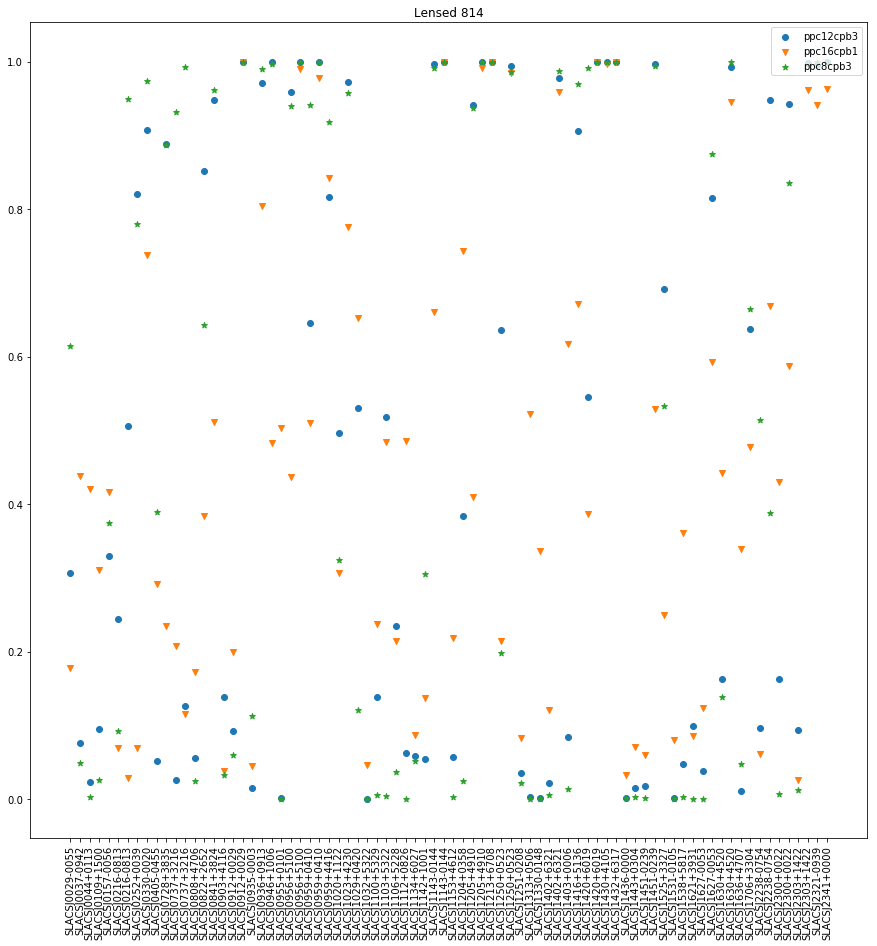

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(range(len(list(ppc12cpb3_lensed_814['score']))),list(ppc12cpb3_lensed_814['score']), marker='o',label= 'ppc12cpb3')
plt.scatter(range(len(list(ppc16cpb1_lensed_814['score']))),list(ppc16cpb1_lensed_814['score']), marker='v', label= 'ppc16cpb1')
plt.scatter(range(len(list(ppc8cpb3_lensed_814['score']))),list(ppc8cpb3_lensed_814['score']), marker='*', label= 'ppc8cpb3')
plt.xticks(range(len(list(ppc12cpb3_lensed_814['score']))), filename, rotation=90)  
plt.title('Lensed 814')
plt.legend(loc='upper right')
plt.show()

In [17]:
print sum(ppc12cpb3_lensed_814['score'])
print sum(ppc8cpb3_lensed_814['score'])
print sum(ppc16cpb1_lensed_814['score'])

39.3068738257
39.626904718
36.7774701396


In [18]:
ppc12cpb3_lensed_435 = filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '435'].loc[filescores['ppc12cpb3']['label']==1]
ppc16cpb1_lensed_435 = filescores['ppc16cpb1'].loc[filescores['ppc16cpb1']['band'] == '435'].loc[filescores['ppc16cpb1']['label']==1]
ppc8cpb3_lensed_435 = filescores['ppc8cpb3'].loc[filescores['ppc8cpb3']['band'] == '435'].loc[filescores['ppc8cpb3']['label']==1]
filename = list(filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '435'].loc[filescores['ppc12cpb3']['label']==1]['objname'])

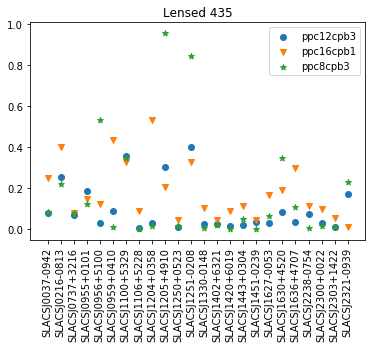

In [19]:
plt.figure()
plt.scatter(range(len(list(ppc12cpb3_lensed_435['score']))),list(ppc12cpb3_lensed_435['score']), marker='o',label= 'ppc12cpb3')
plt.scatter(range(len(list(ppc16cpb1_lensed_435['score']))),list(ppc16cpb1_lensed_435['score']), marker='v', label= 'ppc16cpb1')
plt.scatter(range(len(list(ppc8cpb3_lensed_435['score']))),list(ppc8cpb3_lensed_435['score']), marker='*', label= 'ppc8cpb3')
plt.xticks(range(len(list(ppc8cpb3_lensed_435['score']))), filename, rotation=90)  
plt.title('Lensed 435')
plt.legend(loc='upper right')
plt.show()

In [21]:
ppc12cpb3_unlensed_814 = filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '814'].loc[filescores['ppc12cpb3']['label']==0]
ppc16cpb1_unlensed_814 = filescores['ppc16cpb1'].loc[filescores['ppc16cpb1']['band'] == '814'].loc[filescores['ppc16cpb1']['label']==0]
ppc8cpb3_unlensed_814 = filescores['ppc8cpb3'].loc[filescores['ppc8cpb3']['band'] == '814'].loc[filescores['ppc8cpb3']['label']==0]

In [48]:
max_score_lensed = ppc12cpb3_lensed_814[['filename']]
max_score_lensed['max_score'] = [max(scores) for scores in zip(ppc12cpb3_lensed_814['score'],
                                                               ppc16cpb1_lensed_814['score'],
                                                               ppc8cpb3_lensed_814['score'])]

/Users/f566998/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


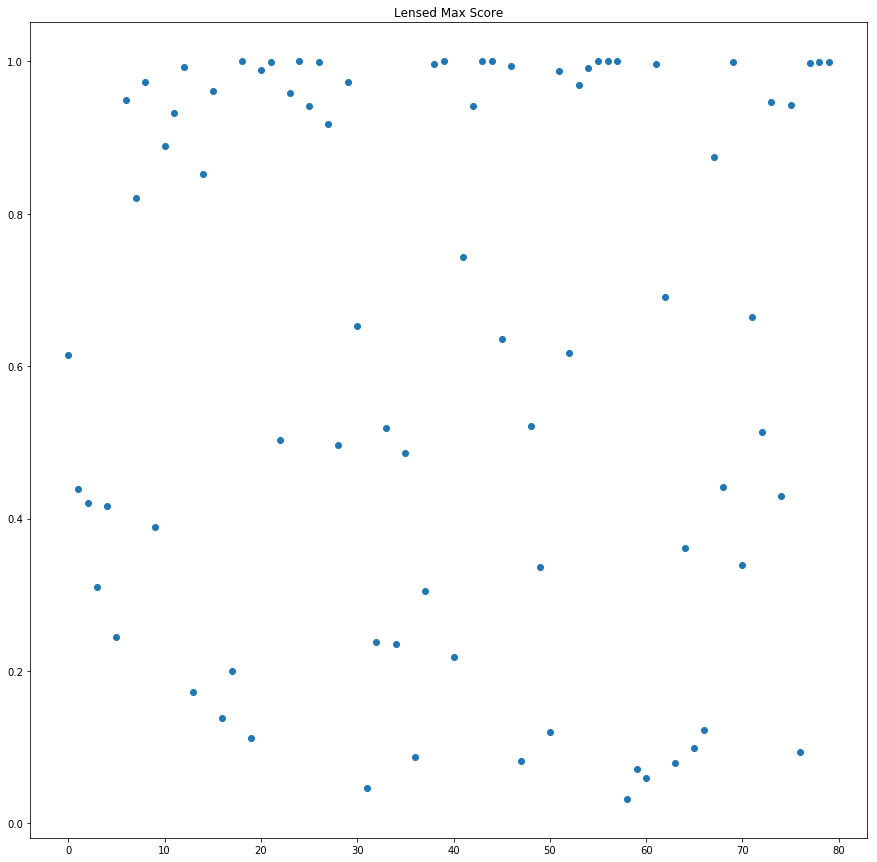

In [49]:
plt.clf()
plt.figure(figsize=(15,15))
plt.scatter(range(len(max_score_lensed['max_score'])),max_score_lensed['max_score'], marker='o')
plt.title('Lensed Max Score')
plt.show()

In [50]:
max_score_unlensed = ppc12cpb3_unlensed_814[['filename']]
max_score_unlensed['max_score'] = [max(scores) for scores in zip(ppc12cpb3_unlensed_814['score'],
                                                                 ppc16cpb1_unlensed_814['score'],
                                                                 ppc8cpb3_unlensed_814['score'])]

/Users/f566998/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


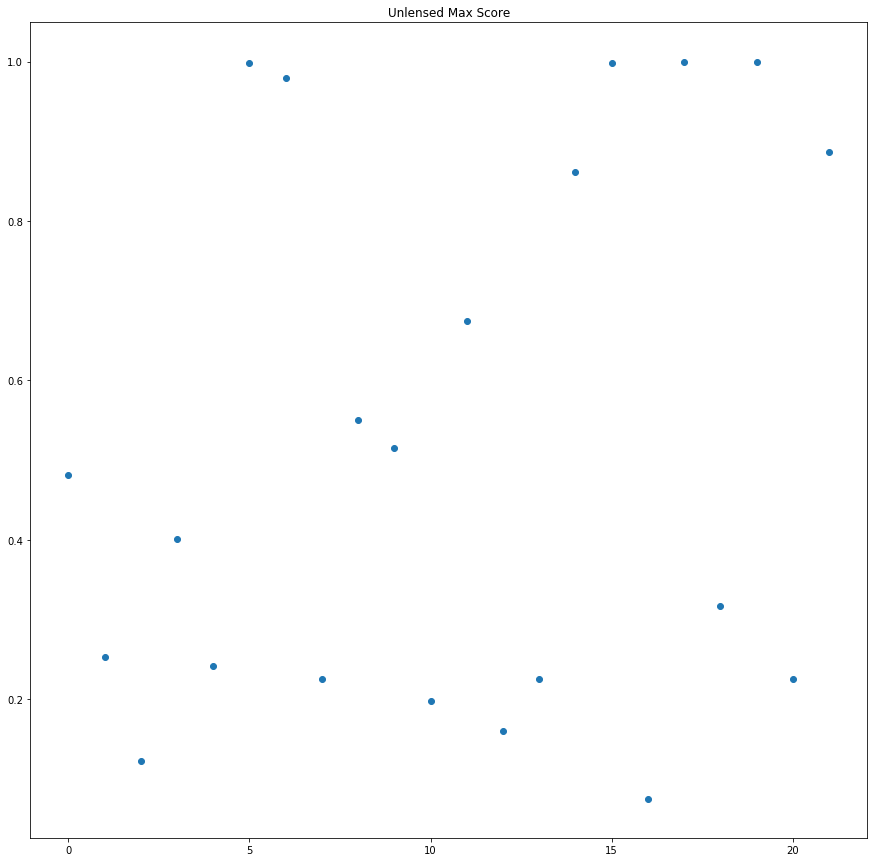

In [51]:
plt.clf()
plt.figure(figsize=(15,15))
plt.scatter(range(len(max_score_unlensed['max_score'])),max_score_unlensed['max_score'], marker='o')
plt.title('Unlensed Max Score')
plt.show()